In [1]:
!python -m pip install prophet

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import os

/home/ubuntu/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
Importing plotly failed. Interactive plots will not work.


In [3]:
    path = os.path.join(os.getcwd(), "ICRISAT-District Level Data.csv")
print(path)
agri_df = pd.read_csv(path)

/home/ubuntu/hub/DiffuseAI/gour/model/ICRISAT-District Level Data.csv


In [4]:
agri_df.drop(agri_df.iloc[:, -6:], inplace=True, axis=1)
agri_df.head()

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SOYABEAN YIELD (Kg per ha),OILSEEDS AREA (1000 ha),OILSEEDS PRODUCTION (1000 tons),OILSEEDS YIELD (Kg per ha),SUGARCANE AREA (1000 ha),SUGARCANE PRODUCTION (1000 tons),SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha)
0,1,1978,14,Chhattisgarh,Durg,612.5,362.2,591.35,48.7,25.6,...,0.00,145.6,17.5,120.19,0.1,0.2,2000.0,0.0,0.0,0.0
1,1,1979,14,Chhattisgarh,Durg,616.8,330.6,535.99,44.6,17.8,...,0.00,102.8,5.4,52.53,0.1,0.1,1000.0,0.0,0.0,0.0
2,1,1980,14,Chhattisgarh,Durg,634.9,515.6,812.10,44.1,33.6,...,0.00,113.4,19.8,174.60,0.1,0.1,1000.0,0.0,0.0,0.0
3,1,1981,14,Chhattisgarh,Durg,630.0,506.9,804.60,41.5,23.6,...,0.00,117.1,15.8,134.93,0.1,0.1,1000.0,0.0,0.0,0.0
4,1,1982,14,Chhattisgarh,Durg,627.9,513.3,817.49,41.1,23.9,...,583.33,117.9,15.9,134.86,0.1,0.2,2000.0,0.0,0.0,0.0


In [5]:
agri_df.isnull().sum()


Dist Code                           0
Year                                0
State Code                          0
State Name                          0
Dist Name                           0
                                   ..
SUGARCANE PRODUCTION (1000 tons)    0
SUGARCANE YIELD (Kg per ha)         0
COTTON AREA (1000 ha)               0
COTTON PRODUCTION (1000 tons)       0
COTTON YIELD (Kg per ha)            0
Length: 74, dtype: int64

In [6]:
agri_df.rename(columns = {'State Code':'state_code', 'State Name':'state',
                              'Dist Name':'dist'}, inplace = True)
print(agri_df.columns[:20])

Index(['Dist Code', 'Year', 'state_code', 'state', 'dist',
       'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)',
       'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)',
       'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)',
       'KHARIF SORGHUM AREA (1000 ha)',
       'KHARIF SORGHUM PRODUCTION (1000 tons)',
       'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)',
       'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)',
       'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)',
       'SORGHUM YIELD (Kg per ha)'],
      dtype='object')


In [7]:
d= {}
for i in agri_df.columns:
    d[i]=("_".join(i.split()[:2])).lower()
    
agri_df.rename(columns = d, inplace = True)
print(agri_df.columns[:20])

Index(['dist_code', 'year', 'state_code', 'state', 'dist', 'rice_area',
       'rice_production', 'rice_yield', 'wheat_area', 'wheat_production',
       'wheat_yield', 'kharif_sorghum', 'kharif_sorghum', 'kharif_sorghum',
       'rabi_sorghum', 'rabi_sorghum', 'rabi_sorghum', 'sorghum_area',
       'sorghum_production', 'sorghum_yield'],
      dtype='object')


In [8]:
ka_df = agri_df[agri_df["state"]=="Karnataka"]
print(np.unique(ka_df["dist"]))
# bang = ka_df[ka_df["dist"] == "Bangalore"]
# bang.columns

['Bangalore' 'Belgaum' 'Bellary' 'Bidar' 'Bijapur / Vijayapura'
 'Chickmagalur' 'Chitradurga' 'Dakshina Kannada' 'Dharwad'
 'Gulbarga / Kalaburagi' 'Hassan' 'Kodagu / Coorg' 'Kolar' 'Mandya'
 'Mysore' 'Raichur' 'Shimoge' 'Tumkur' 'Uttara Kannada']


In [9]:
ka_df = ka_df.replace(to_replace=["Bijapur / Vijayapura", "Gulbarga / Kalaburagi", "Kodagu / Coorg"], value=["Vijaypura", "Gulbarga", "Coorg"])

In [10]:
print(np.unique(ka_df["dist"]))

['Bangalore' 'Belgaum' 'Bellary' 'Bidar' 'Chickmagalur' 'Chitradurga'
 'Coorg' 'Dakshina Kannada' 'Dharwad' 'Gulbarga' 'Hassan' 'Kolar' 'Mandya'
 'Mysore' 'Raichur' 'Shimoge' 'Tumkur' 'Uttara Kannada' 'Vijaypura']


In [11]:
# help(Prophet)

In [12]:
# bang = ka_df[ka_df["dist"] == "Bangalore"]
# rice = [x for x in bang.iloc[:, 5:].columns if x.startswith("rice")]
# bang = bang.loc[:, [1]+rice]
# X = bang.iloc[:, 1].values
# y = bang.iloc[:, 7].values
# fig, axe = plt.subplots(3, figsize=(10, 10))
# sns.lineplot(x="year", y=rice[0], data=bang, c="r", ax=axe[0])
# sns.lineplot(x="year", y=rice[1], data=bang, c="g", ax=axe[1])
# sns.lineplot(x="year", y=rice[2], data=bang, c="b", ax=axe[2])
# fig.tight_layout(pad = 2)

# plt.title("Bangalore-Rice")
# plt.xlabel("Years")
# plt.ylabel("Yield")
# plt.show()

In [13]:
class Crop(object):
    def __init__(self, dist, crop):
        self.dist = dist
        self.crop = crop
        self.dist_data = ka_df[ka_df["dist"] == self.dist]
        self.pp_crop = [x for x in self.dist_data.iloc[:, 5:].columns if x.startswith(self.crop)]
        
    def plotter(self):
        fig, axe = plt.subplots(3, figsize=(10, 10))
        sns.lineplot(x="year", y=self.pp_crop[0], data=self.dist_data, color="r", ax=axe[0])
        sns.lineplot(x="year", y=self.pp_crop[1], data=self.dist_data, color="g", ax=axe[1])
        sns.lineplot(x="year", y=self.pp_crop[2], data=self.dist_data, color="b", ax=axe[2])
        fig.tight_layout(pad = 1.5)
        plt.savefig('/tmp/plot.png')
        
    def pp_model(self):
        m = Prophet(fre)
        df = self.dist_data.loc[:, ["year", self.pp_crop[-1]]]
        cols = df.columns
        df.rename(columns={cols[0]: "ds", cols[1]: "y"}, inplace=True)
        print(df)
        m.fit(df)
        future = m.make_future_dataframe(freq='Y',periods=5)
        # print(future)
        forecast = m.predict(future)
        fig1 = m.plot(forecast, xlabel="Year", ylabel=(self.pp_crop[-1]).upper())
        fig2 = m.plot_components(forecast)
        

Enter the district of Karnataka: bangalore
Enter the crop: rice


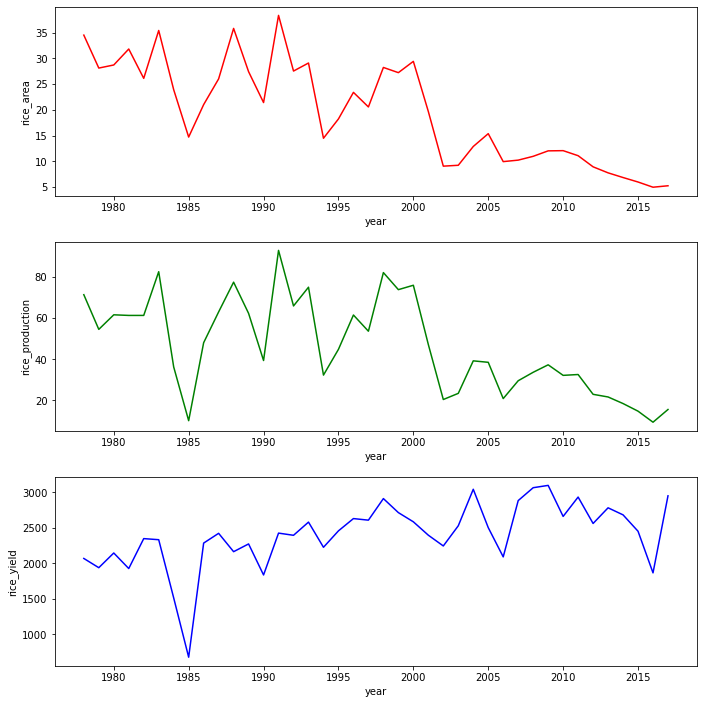

In [14]:
district = input("Enter the district of Karnataka:").strip().capitalize()
crop_name = input("Enter the crop:").strip().lower()
dataplot = Crop(district, crop_name)
dataplot.plotter()

In [15]:
np.unique(ka_df.columns)

array(['barley_area', 'barley_production', 'barley_yield', 'castor_area',
       'castor_production', 'castor_yield', 'chickpea_area',
       'chickpea_production', 'chickpea_yield', 'cotton_area',
       'cotton_production', 'cotton_yield', 'dist', 'dist_code',
       'finger_millet', 'groundnut_area', 'groundnut_production',
       'groundnut_yield', 'kharif_sorghum', 'linseed_area',
       'linseed_production', 'linseed_yield', 'maize_area',
       'maize_production', 'maize_yield', 'minor_pulses', 'oilseeds_area',
       'oilseeds_production', 'oilseeds_yield', 'pearl_millet',
       'pigeonpea_area', 'pigeonpea_production', 'pigeonpea_yield',
       'rabi_sorghum', 'rapeseed_and', 'rice_area', 'rice_production',
       'rice_yield', 'safflower_area', 'safflower_production',
       'safflower_yield', 'sesamum_area', 'sesamum_production',
       'sesamum_yield', 'sorghum_area', 'sorghum_production',
       'sorghum_yield', 'soyabean_area', 'soyabean_production',
       'soyabean_yie

In [16]:
# plt.figure(figsize=(25,15))
# sns.barplot(x=X, y=y)
# plt.xticks(rotation=90)
# plt.show()

06:04:39 - cmdstanpy - INFO - Chain [1] start processing


        ds        y
2520  1978  2069.57
2521  1979  1939.50
2522  1980  2146.34
2523  1981  1927.67
2524  1982  2348.66
2525  1983  2333.33
2526  1984  1514.64
2527  1985   680.27
2528  1986  2285.71
2529  1987  2423.08
2530  1988  2164.80
2531  1989  2273.72
2532  1990  1837.38
2533  1991  2426.04
2534  1992  2395.35
2535  1993  2580.81
2536  1994  2226.68
2537  1995  2457.74
2538  1996  2630.45
2539  1997  2608.27
2540  1998  2911.76
2541  1999  2714.44
2542  2000  2585.03
2543  2001  2396.74
2544  2002  2245.30
2545  2003  2529.28
2546  2004  3042.74
2547  2005  2503.26
2548  2006  2091.64
2549  2007  2883.56
2550  2008  3064.78
2551  2009  3097.34
2552  2010  2660.86
2553  2011  2933.21
2554  2012  2561.66
2555  2013  2781.94
2556  2014  2682.75
2557  2015  2452.26
2558  2016  1866.88
2559  2017  2950.57


06:04:40 - cmdstanpy - INFO - Chain [1] done processing


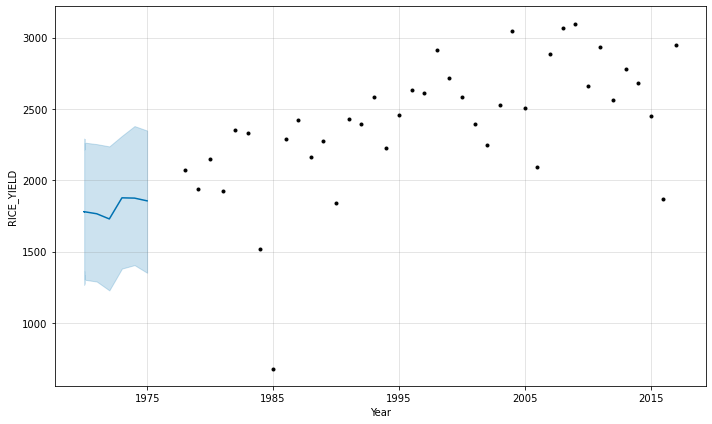

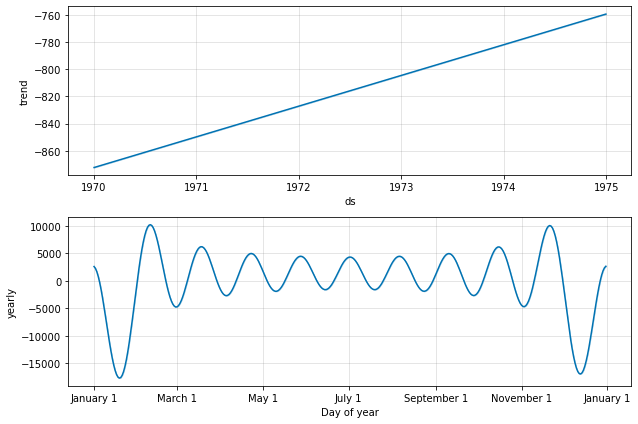

In [19]:
dataplot.pp_model()

In [18]:
import session_info
session_info.show()

ModuleNotFoundError: No module named 'session_info'